In [5]:
! pip freeze

absl-py==2.1.0
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
cachetools==5.4.0
certifi==2024.7.4
cffi==1.17.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
editdistance==0.8.1
efficientnet==1.0.0
essential-generators==1.0
exceptiongroup==1.2.2
executing==2.0.1
fastjsonschema==2.20.0
filelock==3.15.4
flatbuffers==24.3.25
fonttools==4.53.1
fqdn==1.5.1
fsspec==2024.6.1
gast==0.4.0
google-auth==2.33.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.65.5
h11==0.14.0
h5py==3.11.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
imageio==2.35.1
imgaug==0.4.0
importlib_metadata==8.2.0
importlib_resources==6.4.4
intel-openmp==2021.4.0
ipykernel==6.29.5
ipython==8.18.1
ipywidgets==8.1.3
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
j

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

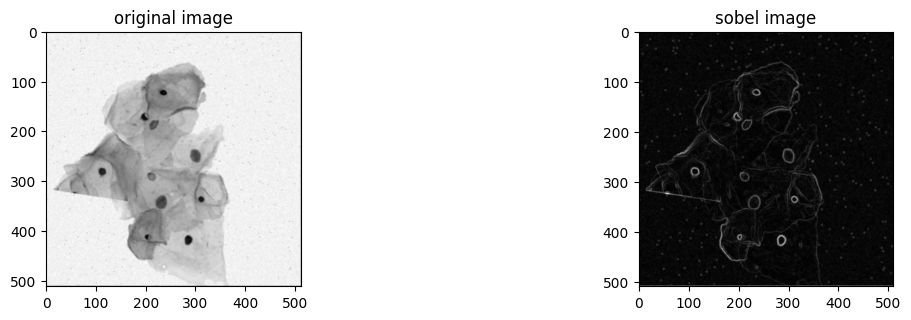

In [2]:
def conv2D (img, kernel):
    y,x = img.shape
    n,m = kernel.shape
    y = y-n+1
    x = x-m+1
    newimg = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            newimg[i][j] = np.sum( img[i:i+m,j:j+m] * kernel )
    return newimg

def to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def sobel_filter(img):
    ker_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    ker_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    grad_x = conv2D(img, ker_x)
    grad_y = conv2D(img, ker_y)
    grad = np.sqrt( (grad_x)**2 + (grad_y)**2 )
    grad_mag = ( grad / np.max(grad) ) *255
    return grad_mag

image_path = r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\filtering_threshold_otsu_watershed_images_region_growing\train_044.png"
img = cv2.imread(image_path)
gray_img = to_grayscale(img)
sobel = sobel_filter(gray_img)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title("original image")
plt.imshow(gray_img, cmap="gray")

plt.subplot(2,2,2)
plt.title("sobel image")
plt.imshow(sobel, cmap="gray")

plt.tight_layout()
plt.show()
    

[[0.15915494 0.09653235 0.15915494]
 [0.26240214 0.15915494 0.26240214]
 [0.15915494 0.09653235 0.15915494]]


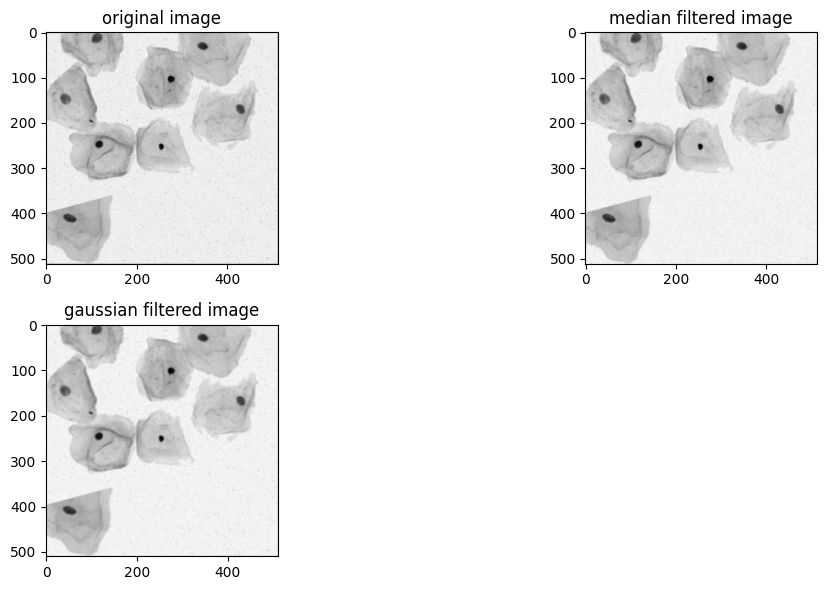

In [3]:
def median_filter(img, kernel_size):
    pad = kernel_size//2
    padded_img = np.pad(img, ((pad,pad), (pad,pad)), mode='reflect')
    filtered_img = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[0]):
            window = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i][j] = np.median(window)
            
    return filtered_img

def gaussian_kernel (size, sigma):
    kernel = np.fromfunction(
        lambda x,y : (1/(2*np.pi*sigma**2)) * np.exp (-( (x-(size-1)/2 )**2 - ( y-(size-1)/2 )**2 ) / (2*sigma**2) ), 
        (size,size)
    )
    return kernel

def gaussian_filter(img , kernel_size, sigma):
    kernel = gaussian_kernel(kernel_size, sigma)
    print(kernel)
    gaussian_img = conv2D(img, kernel)
    return gaussian_img


image_path = r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\filtering_threshold_otsu_watershed_images_region_growing\train_030.png"
img = cv2.imread(image_path)
gray_img = to_grayscale(img)

median_fil_img = median_filter(gray_img, kernel_size=3)

gaussian_blur_img = gaussian_filter(gray_img, kernel_size=3, sigma=1)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title("original image")
plt.imshow(gray_img, cmap="gray")

plt.subplot(2,2,2)
plt.title("median filtered image")
plt.imshow(median_fil_img, cmap="gray")

plt.subplot(2,2,3)
plt.title("gaussian filtered image")
plt.imshow(gaussian_blur_img, cmap="gray")

plt.tight_layout()
plt.show()

    